- Task 1: Load the built-in image 'coffee' of the skimage libraries. Details can be found at https://scikit-image.org/docs/stable/auto_examples/data/plot_general.html#sphx-glr-auto-examples-data-plot-general-py

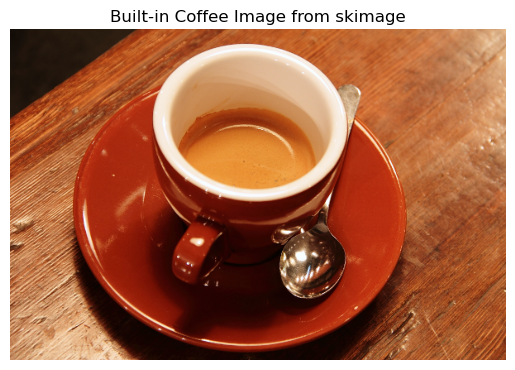

In [2]:
from skimage import data
import matplotlib.pyplot as plt

# Load the built-in 'coffee' image
coffee_image = data.coffee()

# Display the image
plt.imshow(coffee_image)
plt.title("Built-in Coffee Image from skimage")
plt.axis('off')
plt.show()


- Task 2: Use the skimage function random_noise to add each of the 7 different types of noise available and generate a 4x2 panel figure with the original image and the 7 corrupted versions. The noise types are:

‘gaussian’ Gaussian-distributed additive noise.
‘localvar’ Gaussian-distributed additive noise, with specified local variance at each point of image.
‘poisson’ Poisson-distributed noise generated from the data.
‘salt’ Replaces random pixels with 1.
‘pepper’ Replaces random pixels with 0 (for unsigned images) or -1 (for signed images).
‘s&p’ Replaces random pixels with either 1 or low_val, where low_val is 0 for unsigned images or -1 for signed images.
‘speckle’ Multiplicative noise using out = image + n*image, where n is Gaussian noise with specified mean & variance.
Documentation of the function can be found at https://scikit-image.org/docs/stable/api/skimage.util.html#skimage.util.random_noise

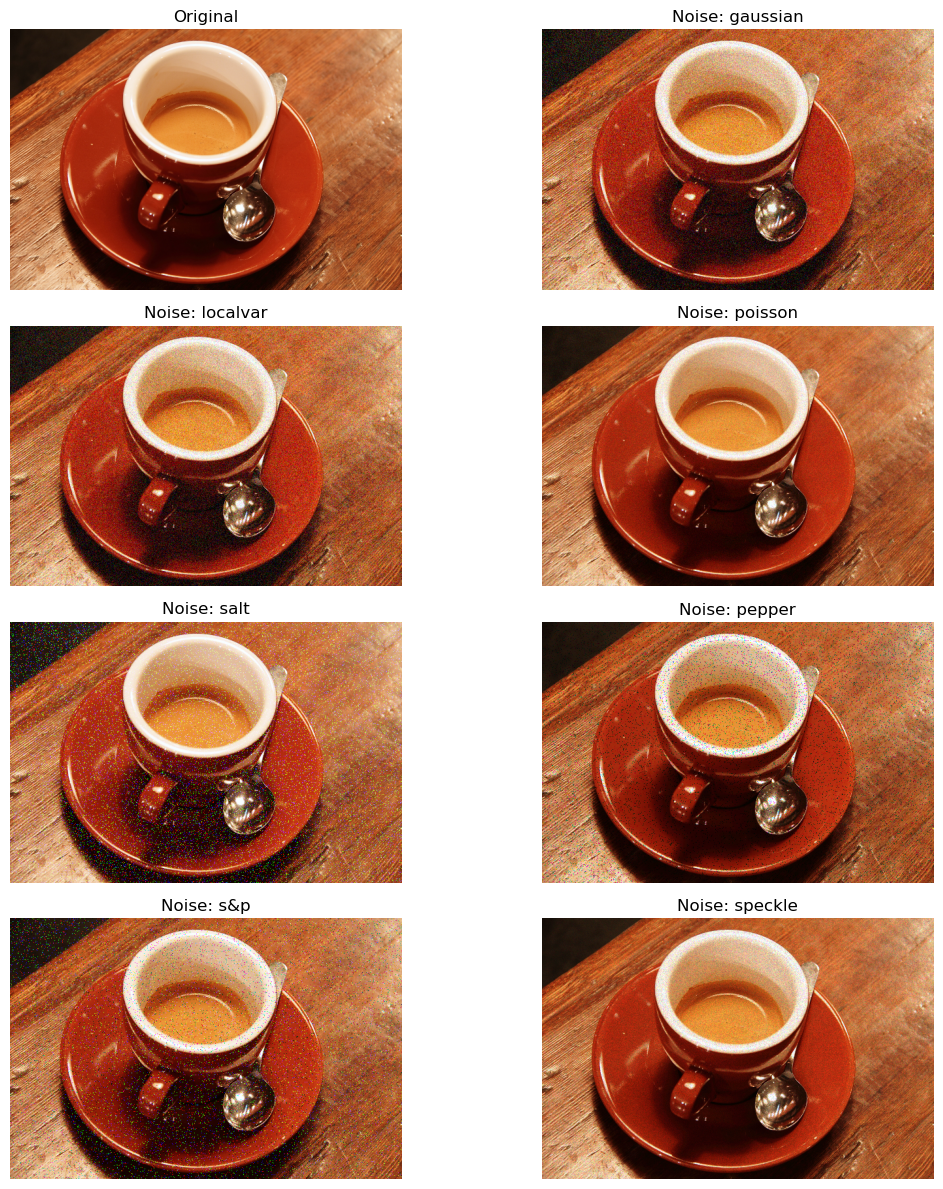

In [3]:
import matplotlib.pyplot as plt
from skimage import data, util

# Load the original image
original = data.coffee()

# List of noise types
noise_types = [
    'gaussian', 'localvar', 'poisson',
    'salt', 'pepper', 's&p', 'speckle'
]

# Apply noise to the image
noisy_images = [util.random_noise(original, mode=mode) for mode in noise_types]

# Prepare figure
fig, axes = plt.subplots(4, 2, figsize=(12, 12))
axes = axes.ravel()  # Flatten the 2D array of axes for easy iteration

# Plot the original image
axes[0].imshow(original)
axes[0].set_title("Original")
axes[0].axis('off')

# Plot each noisy image
for i, (noise_img, mode) in enumerate(zip(noisy_images, noise_types), start=1):
    axes[i].imshow(noise_img)
    axes[i].set_title(f"Noise: {mode}")
    axes[i].axis('off')

# Hide any unused subplots (since we only use 8 out of 8)
plt.tight_layout()
plt.show()


- Task 3: Select one of the noise types and generate 3 noisy images with different noise intensity levels. Represent the original image along with them in a 2x2 figure.

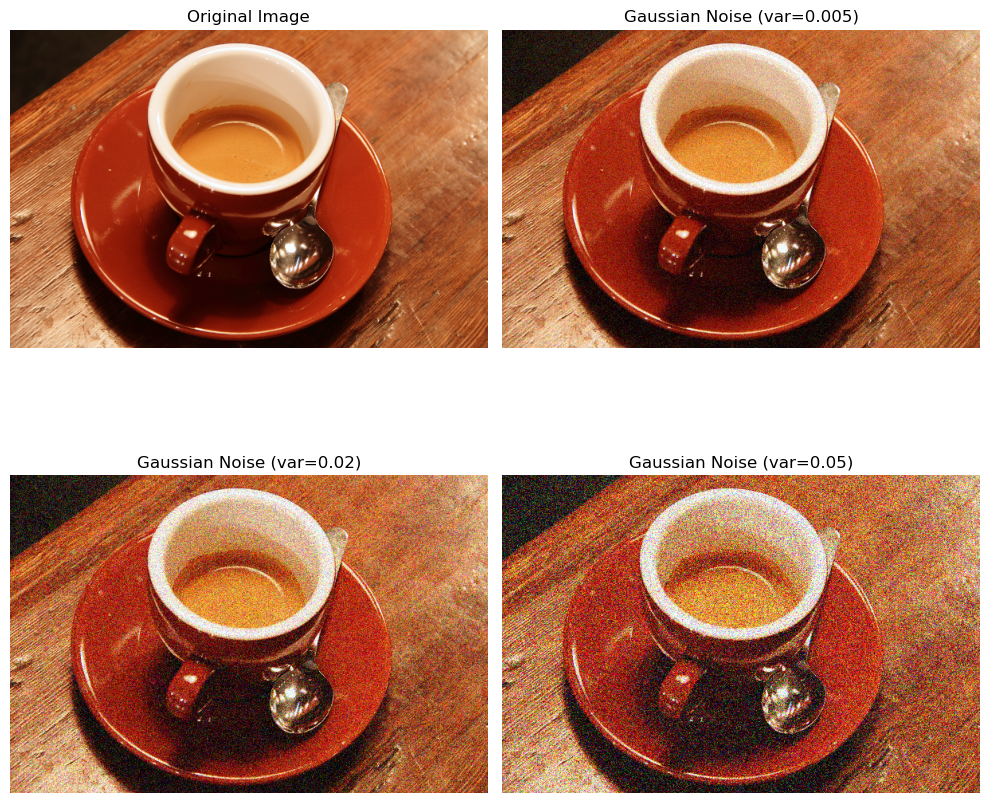

In [4]:
import matplotlib.pyplot as plt
from skimage import data, util

# Load original image
original = data.coffee()

# Define different noise intensity levels (variance)
variances = [0.005, 0.02, 0.05]  # Low, medium, high noise

# Generate noisy images with different variances
noisy_images = [
    util.random_noise(original, mode='gaussian', var=v)
    for v in variances
]

# Set up 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.ravel()

# Show original
axes[0].imshow(original)
axes[0].set_title("Original Image")
axes[0].axis('off')

# Show noisy images
for i, (img, var) in enumerate(zip(noisy_images, variances), start=1):
    axes[i].imshow(img)
    axes[i].set_title(f"Gaussian Noise (var={var})")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


**- Task 4: **The standard deviation for Gaussian kernel affects the behavior of the gaussian filter (parameter sigma, see documentation https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.gaussian). Explore the effect of the parameter sigma when applying a gaussian filter to the tree noisy images generated in the previus task. Represent and comment the results.

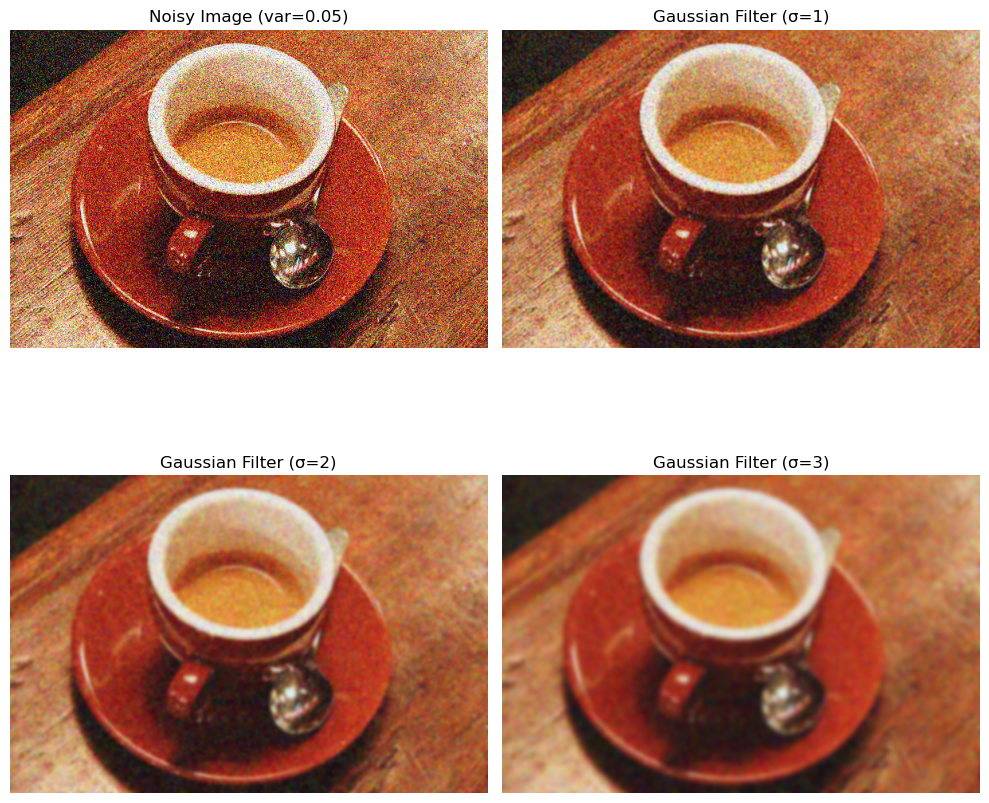

In [5]:
import matplotlib.pyplot as plt
from skimage import data, util, filters

# Load original image
original = data.coffee()

# Create one noisy image with high variance
noisy = util.random_noise(original, mode='gaussian', var=0.05)

# Apply Gaussian filter with different sigma values
sigmas = [1, 2, 3]
filtered_images = [filters.gaussian(noisy, sigma=sigma, channel_axis=-1) for sigma in sigmas]

# Set up 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.ravel()

# Original noisy image
axes[0].imshow(noisy)
axes[0].set_title("Noisy Image (var=0.05)")
axes[0].axis('off')

# Filtered images
for i, (img, sigma) in enumerate(zip(filtered_images, sigmas), start=1):
    axes[i].imshow(img)
    axes[i].set_title(f"Gaussian Filter (σ={sigma})")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


**Results**

σ = 1: Slight smoothing; details are mostly preserved, but small noise is reduced.

σ = 2: More aggressive smoothing; noise is more suppressed, but some fine details blur.

σ = 3: Heavy smoothing; most noise removed, but edges and textures are significantly blurred.

- Task 5: Detect the edges of the bricks in the built-in image 'bricks' using a Prewitt edge detection filter. Quantify what is the fraction of the image corresponding to bricks and to edges.

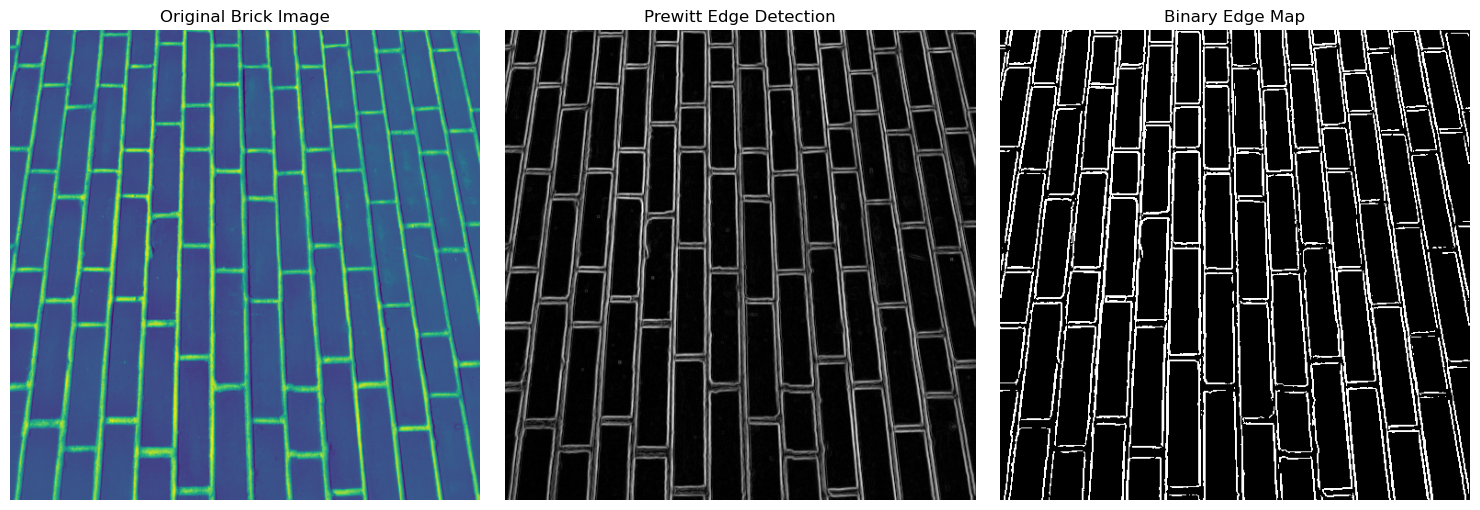

Fraction of edge pixels: 0.1504
Fraction of brick (non-edge) pixels: 0.8496


In [15]:
import matplotlib.pyplot as plt
from skimage import data, color, filters
import numpy as np

# Load the 'brick' image
image = data.brick()

# Apply Prewitt edge detection
edges = filters.prewitt(image)

# Threshold the edge image to create a binary edge map
threshold = 0.1  # Adjust this value as needed
binary_edges = edges > threshold

# Calculate the fraction of edge pixels
total_pixels = binary_edges.size
edge_pixels = np.sum(binary_edges)
edge_fraction = edge_pixels / total_pixels
brick_fraction = 1 - edge_fraction

# Display the results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image)
axes[0].set_title('Original Brick Image')
axes[0].axis('off')

axes[1].imshow(edges, cmap='gray')
axes[1].set_title('Prewitt Edge Detection')
axes[1].axis('off')

axes[2].imshow(binary_edges, cmap='gray')
axes[2].set_title('Binary Edge Map')
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Print the fractions
print(f"Fraction of edge pixels: {edge_fraction:.4f}")
print(f"Fraction of brick (non-edge) pixels: {brick_fraction:.4f}")


- Task 6: Apply a high-pass filter and a low-pass filter in the frequency domain to the skimage built-in image 'grass'. Represent the results and discuss the correspondance between spatial patterns in the original image and high/low frequency components of its the Fourier transform.

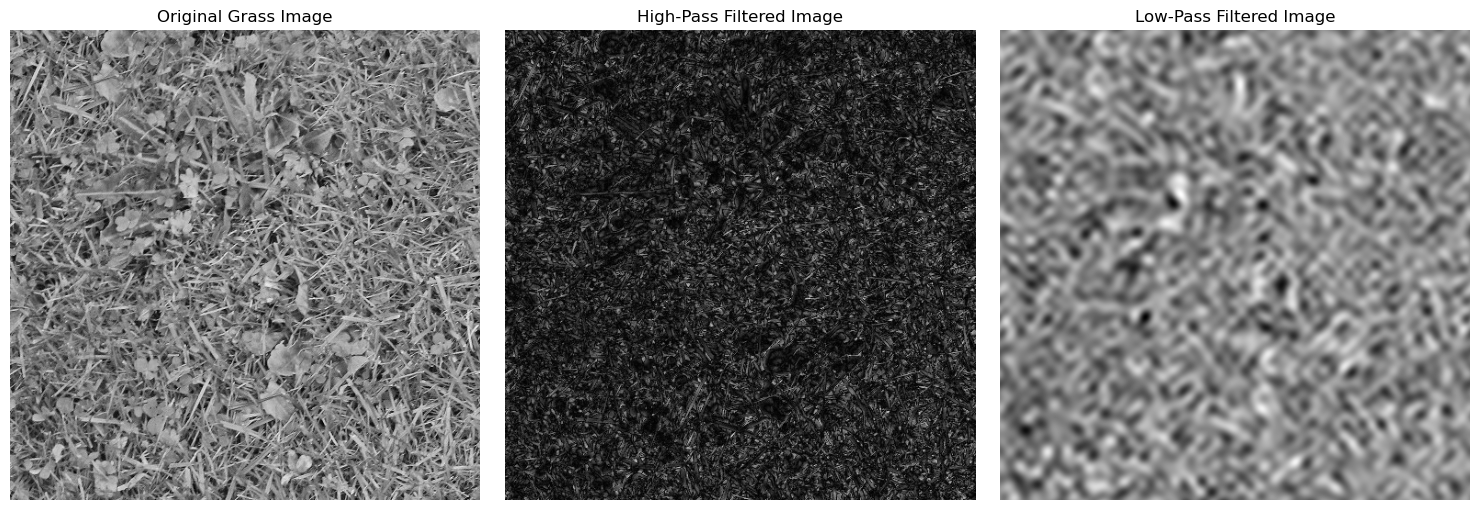

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

# Load the grayscale 'grass' image directly
image = data.grass()

# Perform 2D Fourier Transform
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)  # Shift zero-frequency component to the center

# Get image size and center
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2

# Create High-Pass Filter (zero out center square)
high_pass = fshift.copy()
size = 30  # size of the low-frequency area to remove
high_pass[crow - size:crow + size, ccol - size:ccol + size] = 0

# Create Low-Pass Filter (zero out everything except center square)
low_pass = np.zeros_like(fshift)
low_pass[crow - size:crow + size, ccol - size:ccol + size] = fshift[crow - size:crow + size, ccol - size:ccol + size]

# Inverse FFT to spatial domain
hpf_image = np.fft.ifft2(np.fft.ifftshift(high_pass))
lpf_image = np.fft.ifft2(np.fft.ifftshift(low_pass))

# Get magnitude (real part)
hpf_image = np.abs(hpf_image)
lpf_image = np.abs(lpf_image)

# Display the results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Grass Image")
axes[0].axis('off')

axes[1].imshow(hpf_image, cmap='gray')
axes[1].set_title("High-Pass Filtered Image")
axes[1].axis('off')

axes[2].imshow(lpf_image, cmap='gray')
axes[2].set_title("Low-Pass Filtered Image")
axes[2].axis('off')

plt.tight_layout()
plt.show()


**Interpretation**

Original: Shows natural texture — a mix of low and high frequencies.

High-Pass: Highlights texture (sharp edges), removes smooth lighting or shading.

Low-Pass: Removes texture detail, preserves gradual brightness shifts (blurry look).

- Task 7: Use the function binary_blobs to generate an image with random blobs: https://scikit-image.org/docs/stable/api/skimage.data.html#skimage.data.binary_blobs How many consecutive morphological erosions are needed in order to remove all the blobs? Use a disk-shaped structuring element of radius 3 pixels (footprint). https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.disk

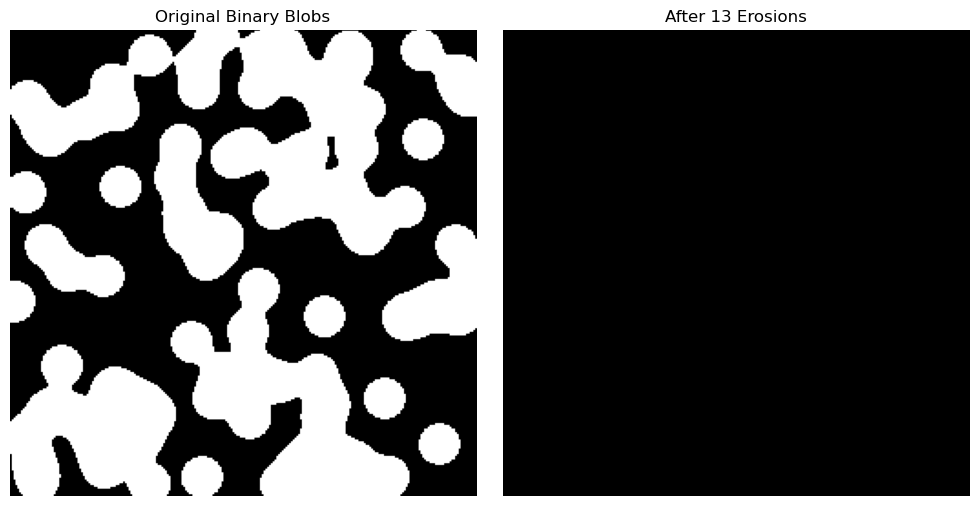

Number of consecutive erosions needed to remove all blobs: 13


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.data import binary_blobs
from skimage.morphology import erosion, disk

# Generate binary blobs with default settings (no seed)
image = binary_blobs(length=256)

# Create disk-shaped structuring element with radius 3
selem = disk(3)

# Initialize erosion loop
eroded = image.copy()
iterations = 0

# Apply erosion until all blobs are removed
while np.any(eroded):
    eroded = erosion(eroded, selem)
    iterations += 1

# Display original and final eroded image
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Binary Blobs')
axes[0].axis('off')

axes[1].imshow(eroded, cmap='gray')
axes[1].set_title(f'After {iterations} Erosions')
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Output the result
print(f"Number of consecutive erosions needed to remove all blobs: {iterations}")
